In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# The Data

train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Exploratory Data Analysis

In [5]:
# Missing Data
# Counting no. of null values present in data for each column.

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

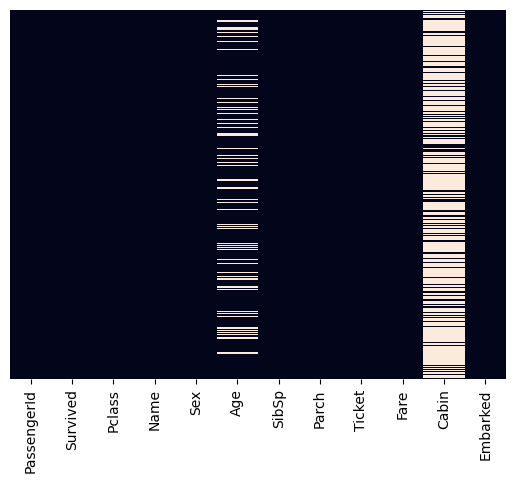

In [7]:
# Missing Data
# We can use seaborn to create a simple heatmap to see where we are missing data!

sns.heatmap(train.isnull(), yticklabels = False, cbar = False) 
# use <cmap = 'virdis'> (for color scheme')

In [13]:
#  In Seaborn, we can use sns.set_style() to set the overall appearance of plots. 
#  It controls the background style and grid visibility.

# Seaborn provides five built-in themes:
# "darkgrid" (Default) → Grid lines with a dark background
# "whitegrid" → Grid lines with a white background
# "dark" → Dark background without grid lines
# "white" → White background without grid lines
# "ticks" → White background with ticks on axes

sns.set_style('darkgrid')

In [15]:
# List of column names presend in dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='count'>

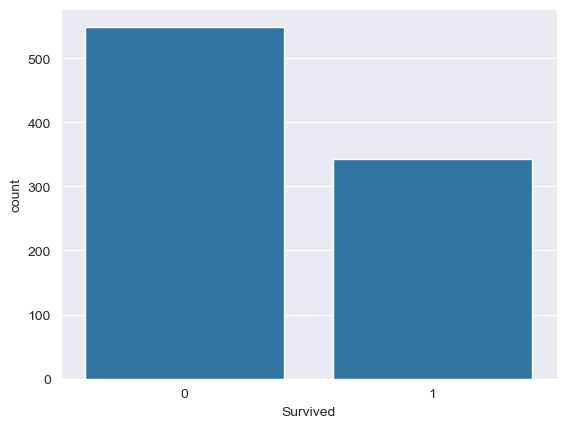

In [17]:
# seaborn.countplot() is used to visualize the count (frequency) of categorical variables in a dataset. 
# It helps understand the distribution of categories.

# 1 Counto of Survived or Not Survived
sns.countplot(x='Survived', data=train)

# 2
# sns.countplot(x='Survived', data = train, hue = 'Sex')                              # palette='RdBu_r'

# 3
# sns.countplot(x='Survived', data = train, hue = 'Pclass', palette = 'rainbow')

# 4 use of dropna
# sns.displot(train['Age'].dropna(), kde=False, bins=30)

# 5
# train['Age'].hist(bins=30)                                                        # color='darked', alpha=0.7

# 6
# sns.countplot(x='SibSp', data=train)

# 7
# train['Fare'].hist(color = 'green', bins=30, figsize=(8,4))

Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

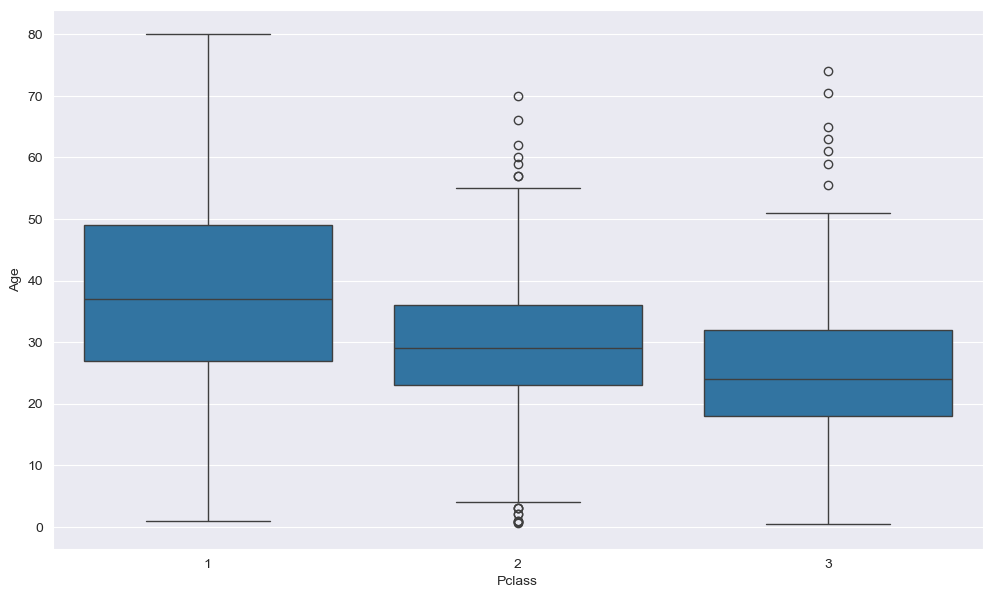

In [20]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [22]:
def impute_age(cols):
    Age = cols.iloc[0]                              # ✅ Use iloc to access by position
    Pclass = cols.iloc[1]                           # ✅ Use iloc to access by position
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [24]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [26]:
train.isnull().sum()

#sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
train.drop('Cabin', axis=1, inplace = True)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
train.dropna(inplace = True)

In [34]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#Converting Categorical Features

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [41]:
# converting Sex column to 0s and 1s using pd.get_dummies
pd.get_dummies(train['Sex'])

sex = pd.get_dummies(train['Sex'], drop_first=True)

In [43]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [45]:
pd.get_dummies(train['Embarked'])
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [47]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [49]:
train = pd.concat([train,sex,embark], axis = 1)

In [51]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False


In [53]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [55]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False


In [57]:
train.drop('PassengerId', axis=1, inplace = True)

In [59]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [63]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [67]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
from sklearn.linear_model import LogisticRegression

In [77]:
logmodel = LogisticRegression(max_iter=1000) # Increase max_iter)

In [79]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [83]:
predictions = logmodel.predict(X_test)

In [87]:
from sklearn.metrics import classification_report

In [95]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.92      0.87       163\n           1       0.85      0.69      0.76       104\n\n    accuracy                           0.83       267\n   macro avg       0.84      0.81      0.82       267\nweighted avg       0.83      0.83      0.83       267\n'

In [97]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [101]:
from sklearn.metrics import confusion_matrix

In [105]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 32,  72]], dtype=int64)

In [107]:
print(confusion_matrix(y_test,predictions))

[[150  13]
 [ 32  72]]
